In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [24]:
# Load training dataset
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [25]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [26]:
# Fill categorical missing values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numeric missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Final check for missing values
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\vicky\AppData\Local\Temp\ipykernel_17088\3056119361.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\vicky\AppData\Local\Temp\ipykernel_17088\3056119361.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

 Encode Categorical Variables

In [27]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed',
                    'Property_Area', 'Loan_Status', 'Dependents']

encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


  Split Features and Target

In [28]:
# Drop 'Loan_ID' first if it's still in the DataFrame
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

# Now define features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']



 Train-Test Split

Split the dataset into training and testing sets (80/20 split):

In [36]:

# This will be used for Random Forest (no scaling)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train and Evaluate Each Model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
logreg_model = LogisticRegression(max_iter=2000)
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()
rf_model = RandomForestClassifier()

# Train models
logreg_model.fit(X_train_scaled, y_train_scaled)
dt_model.fit(X_train_raw, y_train_raw)
nb_model.fit(X_train_scaled, y_train_scaled)
rf_model.fit(X_train_raw, y_train_raw)

# Predict
logreg_pred = logreg_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_raw)
nb_pred = nb_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_raw)

# Accuracy scores
print("Logistic Regression Accuracy:", accuracy_score(y_test_scaled, logreg_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test_raw, dt_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test_scaled, nb_pred))
print("Random Forest Accuracy:", accuracy_score(y_test_raw, rf_pred))


Logistic Regression Accuracy: 0.7886178861788617
Decision Tree Accuracy: 0.7073170731707317
Naive Bayes Accuracy: 0.7804878048780488
Random Forest Accuracy: 0.7642276422764228


Bar Plot of Accuracy Scores

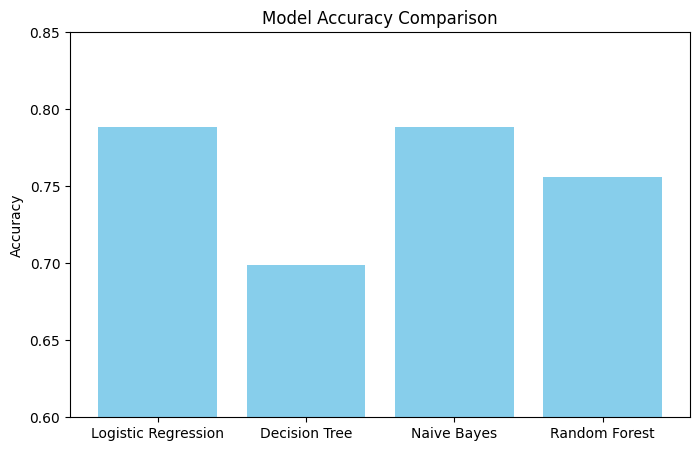

In [31]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest']
accuracy = [0.7886, 0.6992, 0.7886, 0.7561]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.6, 0.85)
plt.show()


Confusion Matrix Heatmaps (per model)

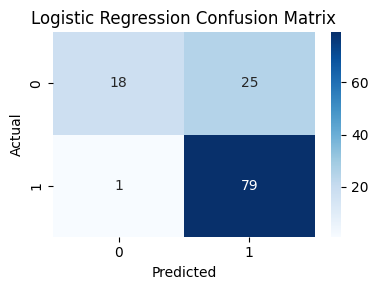

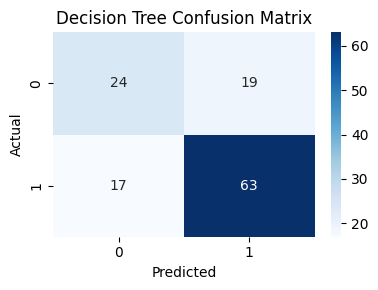

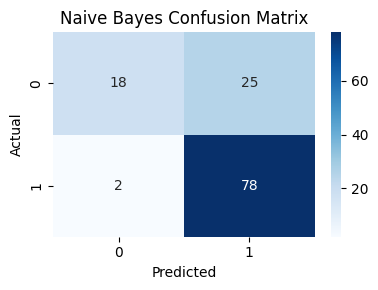

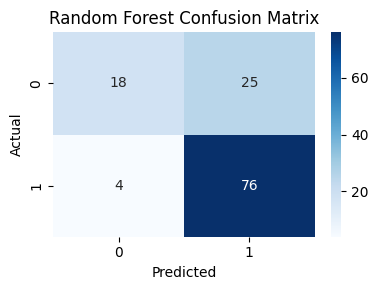

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

models = {
    'Logistic Regression': (logreg_model, X_test_scaled, y_test_scaled),
    'Decision Tree': (dt_model, X_test_raw, y_test_raw),
    'Naive Bayes': (nb_model, X_test_scaled, y_test_scaled),
    'Random Forest': (rf_model, X_test_raw, y_test_raw)
}

for name, (model, X_t, y_t) in models.items():
    y_pred = model.predict(X_t)
    cm = confusion_matrix(y_t, y_pred)
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


Hyper Parameter Tuning


In [39]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression (scaled)
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=2000), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_scaled, y_train_scaled)
best_logreg = logreg_grid.best_estimator_
logreg_pred = best_logreg.predict(X_test_scaled)
print("✅ Logistic Regression Best Params:", logreg_grid.best_params_)
print("🎯 Accuracy:", accuracy_score(y_test_scaled, logreg_pred))


# Random Forest (raw)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_raw, y_train_raw)
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test_raw)
print("✅ Random Forest Best Params:", rf_grid.best_params_)
print("🎯 Accuracy:", accuracy_score(y_test_raw, rf_pred))


# Naive Bayes (scaled)
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
nb_grid = GridSearchCV(GaussianNB(), nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train_scaled, y_train_scaled)
best_nb = nb_grid.best_estimator_
nb_pred = best_nb.predict(X_test_scaled)
print("✅ Naive Bayes Best Params:", nb_grid.best_params_)
print("🎯 Accuracy:", accuracy_score(y_test_scaled, nb_pred))



✅ Logistic Regression Best Params: {'C': 0.01, 'solver': 'liblinear'}
🎯 Accuracy: 0.7886178861788617
✅ Random Forest Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
🎯 Accuracy: 0.7804878048780488
✅ Naive Bayes Best Params: {'var_smoothing': 1e-09}
🎯 Accuracy: 0.7804878048780488


Evaluate the Best Model

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
 [[18 25]
 [ 2 78]]
ROC AUC Score: 0.7694767441860466


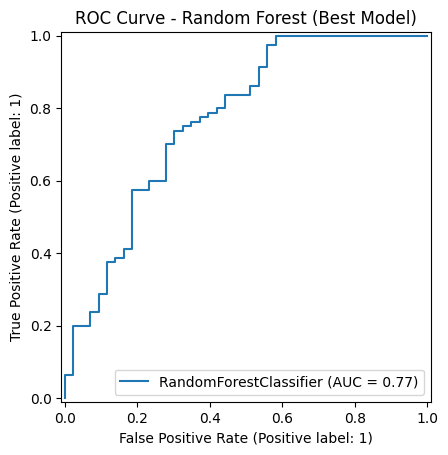

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# ✅ Use the best model from GridSearchCV
y_pred = best_rf.predict(X_test_raw)
y_proba = best_rf.predict_proba(X_test_raw)[:, 1]

print("Classification Report:\n", classification_report(y_test_raw, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_raw, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_raw, y_proba))

RocCurveDisplay.from_estimator(best_rf, X_test_raw, y_test_raw)
plt.title("ROC Curve - Random Forest (Best Model)")
plt.show()




In [41]:
import joblib

joblib.dump(best_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']